Capstone Two

Problem statement formation

Many traders utilise charts and technical price indicators for trading.  A small cryptocurrency hedge fund,  AlphaHunters, has hired us to ascertain empirically which specific combination of indicators have predictive trading value and automatically notify the traders of triggers to trade upon.

Context

Can we build a confluence model of technical price indicators within one week that will be able to predict short term (1s-5m) price fluctuations with a greater than 50% success rate?


Import necessary modules

In [29]:
import requests
import collections
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

Save Tiingo API key

In [3]:
token = 'b9da7667685751fccb7abc6ef3a5bfa246f5144b'

Time to get the data!

In [31]:
headers = {
'Content-Type': 'application/json'
}
requestResponse = requests.get("https://api.tiingo.com/tiingo/daily/BTCUSD/prices?startDate=2013-01-02&token=b9da7667685751fccb7abc6ef3a5bfa246f5144b", headers=headers)
BTCDailydata = requestResponse.json()
BTCDailydata = pd.DataFrame(BTCdata)

Check for nulls

In [22]:
BTCDailydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000002768
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2769 non-null   object 
 1   close        2769 non-null   float64
 2   high         2769 non-null   float64
 3   low          2769 non-null   float64
 4   open         2769 non-null   float64
 5   volume       2769 non-null   float64
 6   adjClose     2769 non-null   float64
 7   adjHigh      2769 non-null   float64
 8   adjLow       2769 non-null   float64
 9   adjOpen      2769 non-null   float64
 10  adjVolume    2769 non-null   float64
 11  divCash      2769 non-null   float64
 12  splitFactor  2769 non-null   float64
dtypes: float64(12), object(1)
memory usage: 302.9+ KB


We'll do a bunch of data exploration here to check the veracity of the data

In [33]:
BTCDailydata.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1970-01-01 00:00:00.000000000,2013-01-03 00:00:00+00:00,13.09,13.19,12.98,13.12,1840.85,13.09,13.19,12.98,13.12,1840.85,0.0,1.0
1970-01-01 00:00:00.000000001,2013-01-04 00:00:00+00:00,13.19,13.26,12.96,13.09,3320.97,13.19,13.26,12.96,13.09,3320.97,0.0,1.0
1970-01-01 00:00:00.000000002,2013-01-05 00:00:00+00:00,13.19,13.24,12.84,13.12,2700.25,13.19,13.24,12.84,13.12,2700.25,0.0,1.0
1970-01-01 00:00:00.000000003,2013-01-06 00:00:00+00:00,13.15,13.19,13.03,13.19,1463.54,13.15,13.19,13.03,13.19,1463.54,0.0,1.0
1970-01-01 00:00:00.000000004,2013-01-07 00:00:00+00:00,13.15,13.15,13.06,13.11,453.56,13.15,13.15,13.06,13.11,453.56,0.0,1.0


In [32]:
BTCDailydata.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1970-01-01 00:00:00.000002764,2020-08-01 00:00:00+00:00,11802.748618,11863.624733,11222.236108,11339.507024,114999.389014,11802.748618,11863.624733,11222.236108,11339.507024,114999.389014,0.0,1.0
1970-01-01 00:00:00.000002765,2020-08-02 00:00:00+00:00,11068.959410,12122.764614,10501.757238,11803.085559,136564.075688,11068.959410,12122.764614,10501.757238,11803.085559,136564.075688,0.0,1.0
1970-01-01 00:00:00.000002766,2020-08-03 00:00:00+00:00,11222.755481,11474.686237,10931.796112,11069.945195,75579.684860,11222.755481,11474.686237,10931.796112,11069.945195,75579.684860,0.0,1.0
1970-01-01 00:00:00.000002767,2020-08-04 00:00:00+00:00,11192.604551,11416.056786,11008.768343,11220.651273,74568.106072,11192.604551,11416.056786,11008.768343,11220.651273,74568.106072,0.0,1.0
1970-01-01 00:00:00.000002768,2020-08-05 00:00:00+00:00,11559.914433,11593.292923,11084.049079,11193.297012,43870.559540,11559.914433,11593.292923,11084.049079,11193.297012,43870.559540,0.0,1.0


Index is funny and date is non datetime, so we'll transform date into DT and set it as index, but make a copy of the DF first to retain a copy with fidelity

In [34]:
daily = BTCDailydata.copy()
daily.date = pd.to_datetime(daily.date)
daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000002768
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   date         2769 non-null   datetime64[ns, UTC]
 1   close        2769 non-null   float64            
 2   high         2769 non-null   float64            
 3   low          2769 non-null   float64            
 4   open         2769 non-null   float64            
 5   volume       2769 non-null   float64            
 6   adjClose     2769 non-null   float64            
 7   adjHigh      2769 non-null   float64            
 8   adjLow       2769 non-null   float64            
 9   adjOpen      2769 non-null   float64            
 10  adjVolume    2769 non-null   float64            
 11  divCash      2769 non-null   float64            
 12  splitFactor  2769 non-null   float64            
dtypes: datetime64[ns, UTC](1), float

In [35]:
daily = daily.set_index('date')
daily.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2013-01-03 00:00:00+00:00,13.09,13.19,12.98,13.12,1840.85,13.09,13.19,12.98,13.12,1840.85,0.0,1.0
2013-01-04 00:00:00+00:00,13.19,13.26,12.96,13.09,3320.97,13.19,13.26,12.96,13.09,3320.97,0.0,1.0
2013-01-05 00:00:00+00:00,13.19,13.24,12.84,13.12,2700.25,13.19,13.24,12.84,13.12,2700.25,0.0,1.0
2013-01-06 00:00:00+00:00,13.15,13.19,13.03,13.19,1463.54,13.15,13.19,13.03,13.19,1463.54,0.0,1.0
2013-01-07 00:00:00+00:00,13.15,13.15,13.06,13.11,453.56,13.15,13.15,13.06,13.11,453.56,0.0,1.0


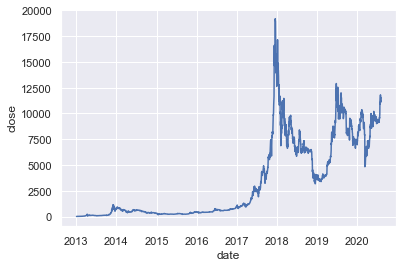

In [37]:
sns.set()
ax = sns.lineplot(x=daily.index, y='close', data=daily)

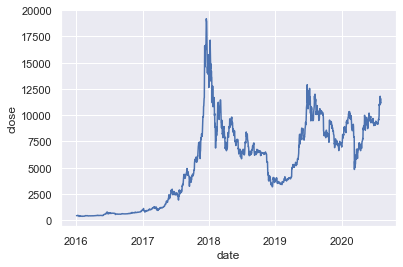

In [40]:
shorter = daily[daily.index > '2016']
sns.set()
ax = sns.lineplot(x=shorter.index, y='close', data=shorter)

In [41]:
daily.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.0,2769.0
mean,3374.076435,3496.980395,3228.131780,3372.782899,38585.546730,3374.076435,3496.980395,3228.131780,3372.782899,38585.546730,0.0,1.0
std,3908.527964,4065.942741,3710.258942,3902.026675,46459.112254,3908.527964,4065.942741,3710.258942,3902.026675,46459.112254,0.0,0.0
min,13.090000,13.150000,12.840000,13.090000,453.560000,13.090000,13.150000,12.840000,13.090000,453.560000,0.0,1.0
25%,363.060000,378.110000,351.800000,364.010000,7513.830000,363.060000,378.110000,351.800000,364.010000,7513.830000,0.0,1.0
50%,778.620000,798.700000,753.700185,780.000000,20854.470000,778.620000,798.700000,753.700185,780.000000,20854.470000,0.0,1.0
75%,6692.940000,6858.678696,6450.703297,6697.212200,54948.746881,6692.940000,6858.678696,6450.703297,6697.212200,54948.746881,0.0,1.0
max,19187.780000,19795.901936,17553.692493,19173.591351,633959.939587,19187.780000,19795.901936,17553.692493,19173.591351,633959.939587,0.0,1.0


A bunch of these columns look superfluous, as divCash is all zeros, split

In [44]:
print((daily.close - daily.adjClose).sum())
print((daily.high - daily.adjHigh).sum())
print((daily.low - daily.adjLow).sum())
print((daily.open - daily.adjOpen).sum())
print((daily.volume - daily.adjVolume).sum())

0.0
0.0
0.0
0.0
0.0


As the above shows, they are indeed superfluous, so I will get rid of them

In [48]:
daily = daily.iloc[:, :5]

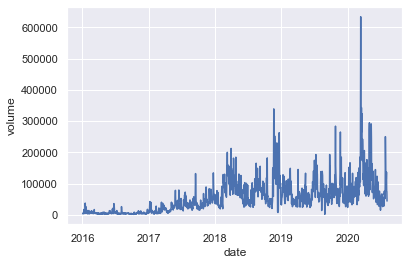

In [50]:
ax = sns.lineplot(x=shorter.index, y='volume', data=shorter)

In [53]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2013-01-03 00:00:00+00:00 to 2020-08-05 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2769 non-null   float64
 1   high    2769 non-null   float64
 2   low     2769 non-null   float64
 3   open    2769 non-null   float64
 4   volume  2769 non-null   float64
dtypes: float64(5)
memory usage: 129.8 KB


OK, I am happy with this daily data.  I will now also gather some intraday data, as I want to test models on different timeframes.

In [57]:
headers = {
    'Content-Type': 'application/json'
    }
requestResponse2 = requests.get("https://api.tiingo.com/tiingo/crypto/prices?tickers=btcusd&startDate=2019-01-02&resampleFreq=1min&token=b9da7667685751fccb7abc6ef3a5bfa246f5144b", headers=headers)
    #convert json into DataFrame

BTCintra = pd.DataFrame(requestResponse2.json())

In [58]:
BTCintra.head()

,ticker,baseCurrency,quoteCurrency,priceData
0,btcusd,btc,usd,"[{'volumeNotional': 791285.7135228901, 'high':..."


In [111]:
BTCintra.priceData

0    [{'volumeNotional': 791285.7135228901, 'high':...
Name: priceData, dtype: object

This looks a lot trickier!

In [96]:
intraday = BTCintra.explode('priceData')

In [97]:
intraday.head()

,ticker,baseCurrency,quoteCurrency,priceData
0,btcusd,btc,usd,"{'volumeNotional': 791285.7135228901, 'high': ..."
0,btcusd,btc,usd,"{'volumeNotional': 194030.27375201887, 'high':..."
0,btcusd,btc,usd,"{'volumeNotional': 34692.09859761145, 'high': ..."
0,btcusd,btc,usd,"{'volumeNotional': 262406.2838979448, 'high': ..."
0,btcusd,btc,usd,"{'volumeNotional': 45620.34682610416, 'high': ..."


I have an index problem here, which may make what comes later harder, so I am going to add an index manually for now

In [98]:
intraday.index = range(len(intraday))

I'll inspect the data in priceData as that looks to be what I need

In [114]:
newdict=intraday.iloc[0].priceData
newdict

{'volumeNotional': 791285.7135228901,
 'high': 3932.972177391603,
 'open': 3914.7494078138848,
 'tradesDone': 324.0,
 'date': '2019-01-02T00:00:00+00:00',
 'close': 3925.788063443805,
 'low': 3914.7494078138848,
 'volume': 201.56098616000003}

Easy enough to make a dataframe out of

In [115]:
newdf=pd.DataFrame(newdict, index=[0])
newdf

,volumeNotional,high,open,tradesDone,date,close,low,volume
0,791285.713523,3932.972177,3914.749408,324.0,2019-01-02T00:00:00+00:00,3925.788063,3914.749408,201.560986


In [117]:
for i in intraday.index[1:]:
    newdf = newdf.append(pd.DataFrame(intraday.iloc[i].priceData, index=[i]))

In [118]:
newdf.head(25)

,volumeNotional,high,open,tradesDone,date,close,low,volume
0,791285.713523,3932.972177,3914.749408,324.0,2019-01-02T00:00:00+00:00,3925.788063,3914.749408,201.560986
1,194030.273752,3942.374264,3936.954030,170.0,2019-01-02T00:01:00+00:00,3940.331912,3929.650825,49.242114
2,34692.098598,3887.899616,3884.556851,66.0,2019-01-02T00:02:00+00:00,3884.570440,3878.076023,8.930743
3,262406.283898,3868.430661,3866.395297,99.0,2019-01-02T00:03:00+00:00,3853.855331,3853.798773,68.089293
4,45620.346826,3859.291731,3855.282949,95.0,2019-01-02T00:04:00+00:00,3849.121730,3846.175532,11.852144
5,58391.307723,3879.383619,3877.980836,46.0,2019-01-02T00:05:00+00:00,3879.031822,3877.492522,15.053062
6,19197.508164,3857.010345,3855.460648,46.0,2019-01-02T00:06:00+00:00,3856.865566,3854.627630,4.977490
7,142589.418763,3959.289708,3953.819480,70.0,2019-01-02T00:07:00+00:00,3959.072208,3953.819480,36.015867
8,460002.027109,3942.563569,3935.128348,138.0,2019-01-02T00:08:00+00:00,3938.485994,3935.107454,116.796664
9,94711.693086,3955.388054,3953.087443,50.0,2019-01-02T00:09:00+00:00,3952.916520,3951.376921,23.959953


Ok looks good, will now tidy it up a bit and set index as datetime

In [119]:
intraday = newdf.copy()

In [120]:
intraday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   volumeNotional  5001 non-null   float64
 1   high            5001 non-null   float64
 2   open            5001 non-null   float64
 3   tradesDone      5001 non-null   float64
 4   date            5001 non-null   object 
 5   close           5001 non-null   float64
 6   low             5001 non-null   float64
 7   volume          5001 non-null   float64
dtypes: float64(7), object(1)
memory usage: 351.6+ KB


In [121]:
intraday.index = pd.to_datetime(intraday.date)

In [123]:
intraday.drop('date', inplace=True, axis=1)

print(intraday.head())

                           volumeNotional         high         open  \
date                                                                  
2019-01-02 00:00:00+00:00   791285.713523  3932.972177  3914.749408   
2019-01-02 00:01:00+00:00   194030.273752  3942.374264  3936.954030   
2019-01-02 00:02:00+00:00    34692.098598  3887.899616  3884.556851   
2019-01-02 00:03:00+00:00   262406.283898  3868.430661  3866.395297   
2019-01-02 00:04:00+00:00    45620.346826  3859.291731  3855.282949   

                           tradesDone        close          low      volume  
date                                                                         
2019-01-02 00:00:00+00:00       324.0  3925.788063  3914.749408  201.560986  
2019-01-02 00:01:00+00:00       170.0  3940.331912  3929.650825   49.242114  
2019-01-02 00:02:00+00:00        66.0  3884.570440  3878.076023    8.930743  
2019-01-02 00:03:00+00:00        99.0  3853.855331  3853.798773   68.089293  
2019-01-02 00:04:00+00:00        9

Volume notional is just volume * price, so that's no use to me.  tradesDone is intriguing though and may prove useful when transformed

In [124]:
intraday.drop('volumeNotional', axis=1, inplace=True)

intraday.head()

,high,open,tradesDone,close,low,volume
date,,,,,,
2019-01-02 00:00:00+00:00,3932.972177,3914.749408,324.0,3925.788063,3914.749408,201.560986
2019-01-02 00:01:00+00:00,3942.374264,3936.954030,170.0,3940.331912,3929.650825,49.242114
2019-01-02 00:02:00+00:00,3887.899616,3884.556851,66.0,3884.570440,3878.076023,8.930743
2019-01-02 00:03:00+00:00,3868.430661,3866.395297,99.0,3853.855331,3853.798773,68.089293
2019-01-02 00:04:00+00:00,3859.291731,3855.282949,95.0,3849.121730,3846.175532,11.852144


In [125]:
intraday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5001 entries, 2019-01-02 00:00:00+00:00 to 2019-01-05 11:20:00+00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   high        5001 non-null   float64
 1   open        5001 non-null   float64
 2   tradesDone  5001 non-null   float64
 3   close       5001 non-null   float64
 4   low         5001 non-null   float64
 5   volume      5001 non-null   float64
dtypes: float64(6)
memory usage: 433.5 KB


In [138]:
intraday.describe()

,high,open,tradesDone,close,low,volume
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,3838.127475,3836.455674,141.771246,3836.459578,3834.781462,30.166644
std,58.991489,58.633060,120.581121,58.664530,58.439231,49.859910
min,3725.383090,3722.644705,7.000000,3722.824222,3721.879133,0.255111
25%,3794.730000,3792.981998,78.000000,3792.949277,3791.606784,10.678066
50%,3827.660313,3826.262540,133.000000,3826.254954,3824.525414,18.657440
75%,3872.216499,3870.691987,175.000000,3870.679513,3869.169058,33.283923
max,4074.941851,4061.301630,3460.000000,4069.963627,4059.405649,1475.731995


Looks good

I'll plot the data to check it's veracity also

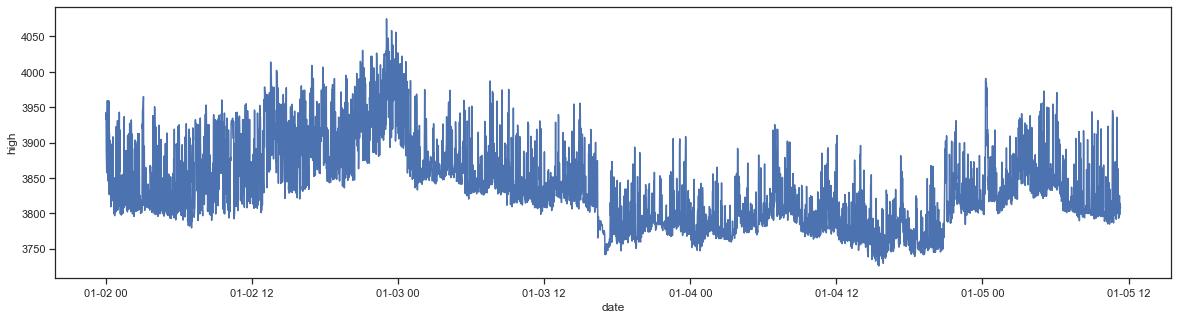

In [136]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')

g1 = sns.lineplot(x=intraday.index, y='high', data=intraday)

plt.show()

This doesn't look right

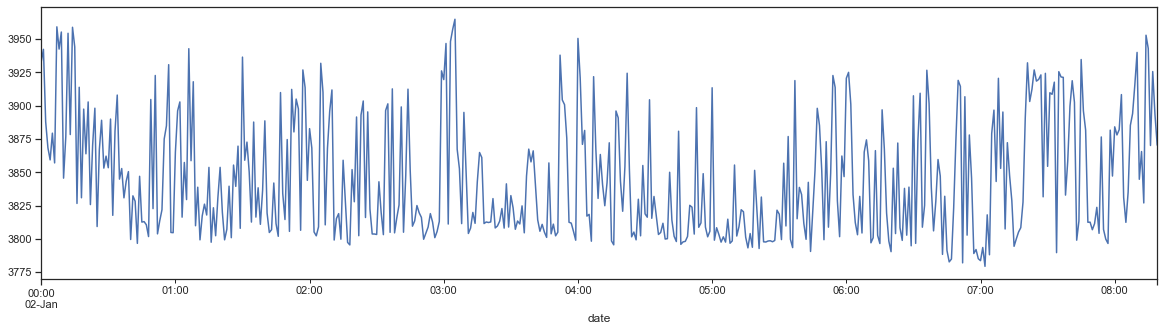

In [137]:
plt.figure(figsize=(20,5))
intraday.iloc[:500].high.plot()
plt.show()

I guess it's just amazingly volatile!  Since this data is only for 3 days, I'm going to want multiple sets of it.

In [139]:
headers = {
    'Content-Type': 'application/json'
    }
requestResponse3 = requests.get("https://api.tiingo.com/tiingo/crypto/prices?tickers=btcusd&startDate=2020-01-02&resampleFreq=1min&token=b9da7667685751fccb7abc6ef3a5bfa246f5144b", headers=headers)
    #convert json into DataFrame

BTCintra2 = pd.DataFrame(requestResponse3.json())

headers = {
    'Content-Type': 'application/json'
    }
requestResponse4 = requests.get("https://api.tiingo.com/tiingo/crypto/prices?tickers=btcusd&startDate=2020-06-01&resampleFreq=1min&token=b9da7667685751fccb7abc6ef3a5bfa246f5144b", headers=headers)
    #convert json into DataFrame

BTCintra3 = pd.DataFrame(requestResponse4.json())

<Figure size 1440x360 with 0 Axes>

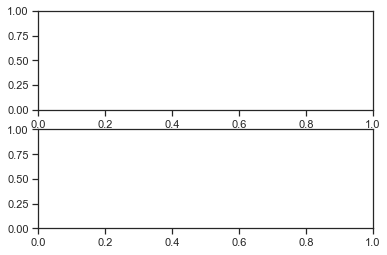

In [143]:
intraday2 = BTCintra2.explode('priceData')
intraday3 = BTCintra3.explode('priceData')

intraday2.index = range(len(intraday2))
intraday3.index = range(len(intraday3))

newdf2=pd.DataFrame(intraday2.iloc[0].priceData, index=[0])
newdf3=pd.DataFrame(intraday3.iloc[0].priceData, index=[0])

for i in intraday2.index[1:]:
    newdf2 = newdf2.append(pd.DataFrame(intraday2.iloc[i].priceData, index=[i]))
    
for i in intraday3.index[1:]:
    newdf3 = newdf3.append(pd.DataFrame(intraday3.iloc[i].priceData, index=[i]))

intraday2 = newdf2.copy()   
intraday3 = newdf3.copy()
    
intraday2.index = pd.to_datetime(intraday2.date)
intraday3.index = pd.to_datetime(intraday3.date)

intraday2.drop(['date', 'volumeNotional'], inplace=True, axis=1)
intraday3.drop(['date', 'volumeNotional'], inplace=True, axis=1)



<Figure size 1440x360 with 0 Axes>

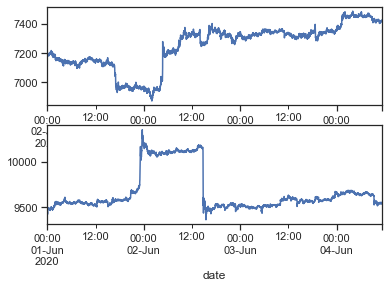

In [144]:
plt.figure(figsize=(20,5))

fig, ax = plt.subplots(2)

intraday2.close.plot(ax=ax[0])
intraday3.close.plot(ax=ax[1])

plt.show()